<a href="https://colab.research.google.com/github/noorlol2005/data-science-principles-group-assignment-/blob/main/DSP_Group_12_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import all necessary libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
# Step 2: Upload and Load CSV File
uploaded = files.upload()  # Upload CSV file
df = pd.read_csv(io.BytesIO(uploaded['student-mat.csv']), delimiter=';')  # Load the CSV file into a DataFrame

# Display the DataFrame and its basic information
pd.set_option('display.max_columns', None)  # Display all columns
display(df)

# Set Target Variable
target_variable = 'G3'  # Specify the target variable
X = df.drop(columns=[target_variable])  # Features
y = df[target_variable]  # Target


Saving student-mat.csv to student-mat.csv


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [ ]:
# Step 3: Check for Missing Values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Identify columns with missing values and their percentage
missing_percentage = df.isnull().mean() * 100
print("\nColumns with Missing Values and Their Percentage:")
print(missing_percentage[missing_percentage > 0])

# Drop rows with missing values and show the new shape
df_dropped = df.dropna()
print("\nShape of Dataset after Dropping Rows with Missing Values:", df_dropped.shape)


Missing values in each column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Columns with Missing Values and Their Percentage:
Series([], dtype: float64)

Shape of Dataset after Dropping Rows with Missing Values: (395, 33)


In [ ]:
# Step 4: Identify and Remove Duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [ ]:
# Step 5: Drop Unnecessary Columns
print("\nColumns available in the dataset before dropping:")
print(df.columns)

# Specify columns to drop
columns_to_drop = ['school', 'reason', 'famsize', 'nursery', 'address', 'guardian', 'travel_time','romantic','paid','Pstatus','Mjob','Fjob','schoolsup','famsup','higher','internet','famrel','freetime','goout','Dalc']

# Drop unnecessary columns safely
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Display the DataFrame after dropping unnecessary columns
print("\nColumns available in the dataset after dropping unnecessary columns:")
print(df.columns)


Columns available in the dataset before dropping:
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Columns available in the dataset after dropping unnecessary columns:
Index(['sex', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'activities', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


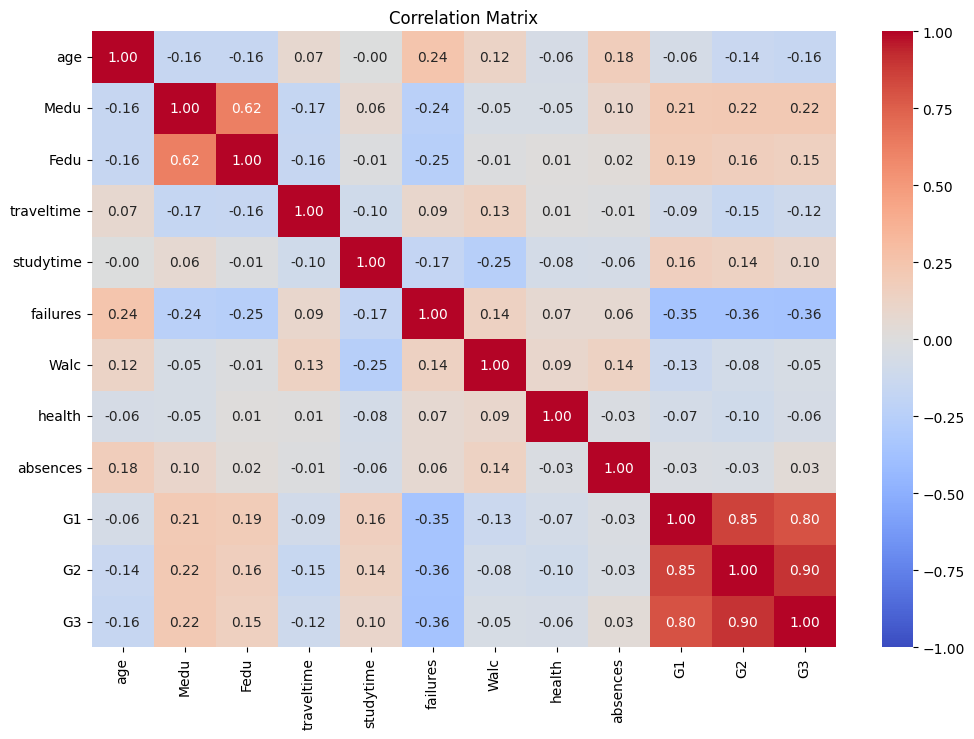

In [ ]:
# Step 6:Compute the correlation matrix
df_encoded = pd.get_dummies(df, drop_first=True)
numeric_df = df_encoded.select_dtypes(include=["number"])
correlation_matrix = numeric_df.corr()


# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()



Correlation Matrix after dropping Medu,Fedu,G1,G2:


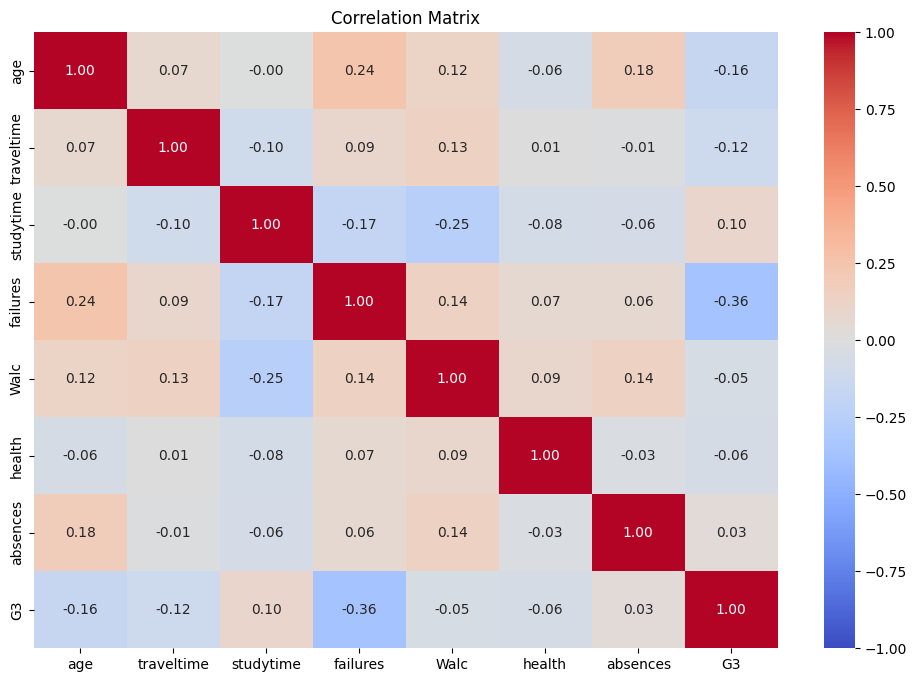

In [ ]:
# Step 7:Drop the specified columns after checking relationship using correlation matrix
columns_to_drop = ['Medu', 'Fedu', 'G1', 'G2']
df_dropped = df.drop(columns=columns_to_drop)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_dropped, drop_first=True)

# Select numeric columns
numeric_df = df_encoded.select_dtypes(include=["number"])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix as a heatmap
print("\nCorrelation Matrix after dropping Medu,Fedu,G1,G2:")
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


Statistical summary of numerical columns:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

             Walc      health    absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000  
mean     2.291139    3.554430    5.708861   10.908861   10.713924  

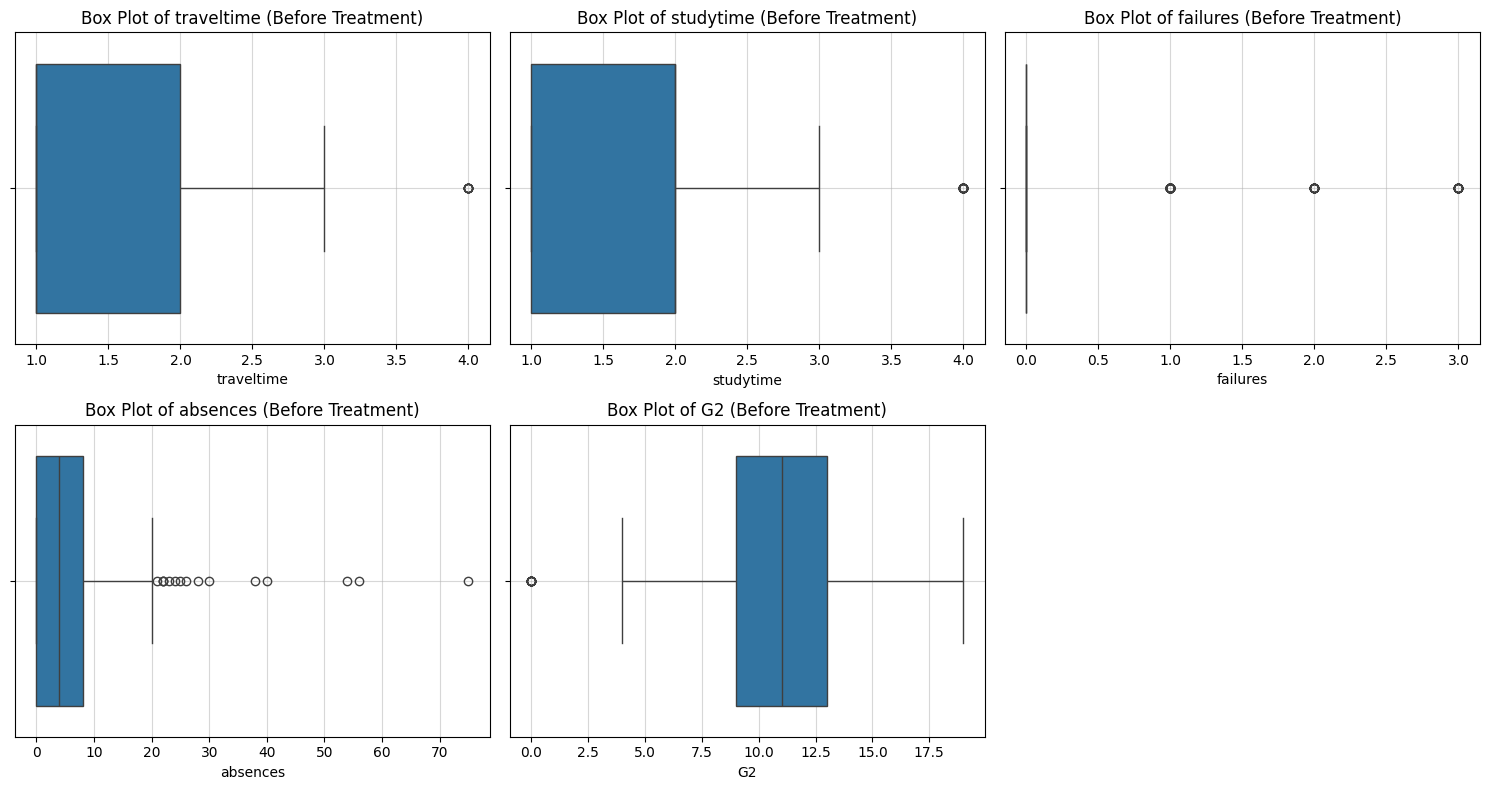

In [ ]:
# Step 8: Statistical Summary and Outlier Detection
print("\nStatistical summary of numerical columns:")
print(df.describe())

# Outlier Detection using IQR
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} - Outliers Detected: {outliers.shape[0]}")

# Columns with outliers
columns_with_outliers = ['traveltime', 'studytime', 'failures', 'absences', 'G2']

# Box plots before treatment of outliers
print("\nBox plots before treatment:")
plt.figure(figsize=(15, 8))
for i, col in enumerate(columns_with_outliers, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} (Before Treatment)')
    plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
#Step 9: Treating outliers
#Winsorizing the columns with outliers
for col in columns_with_outliers:
    df[col] = mstats.winsorize(df[col], limits=[0.05, 0.05])  # Replace 5th and 95th percentiles


Box plots after treatment:


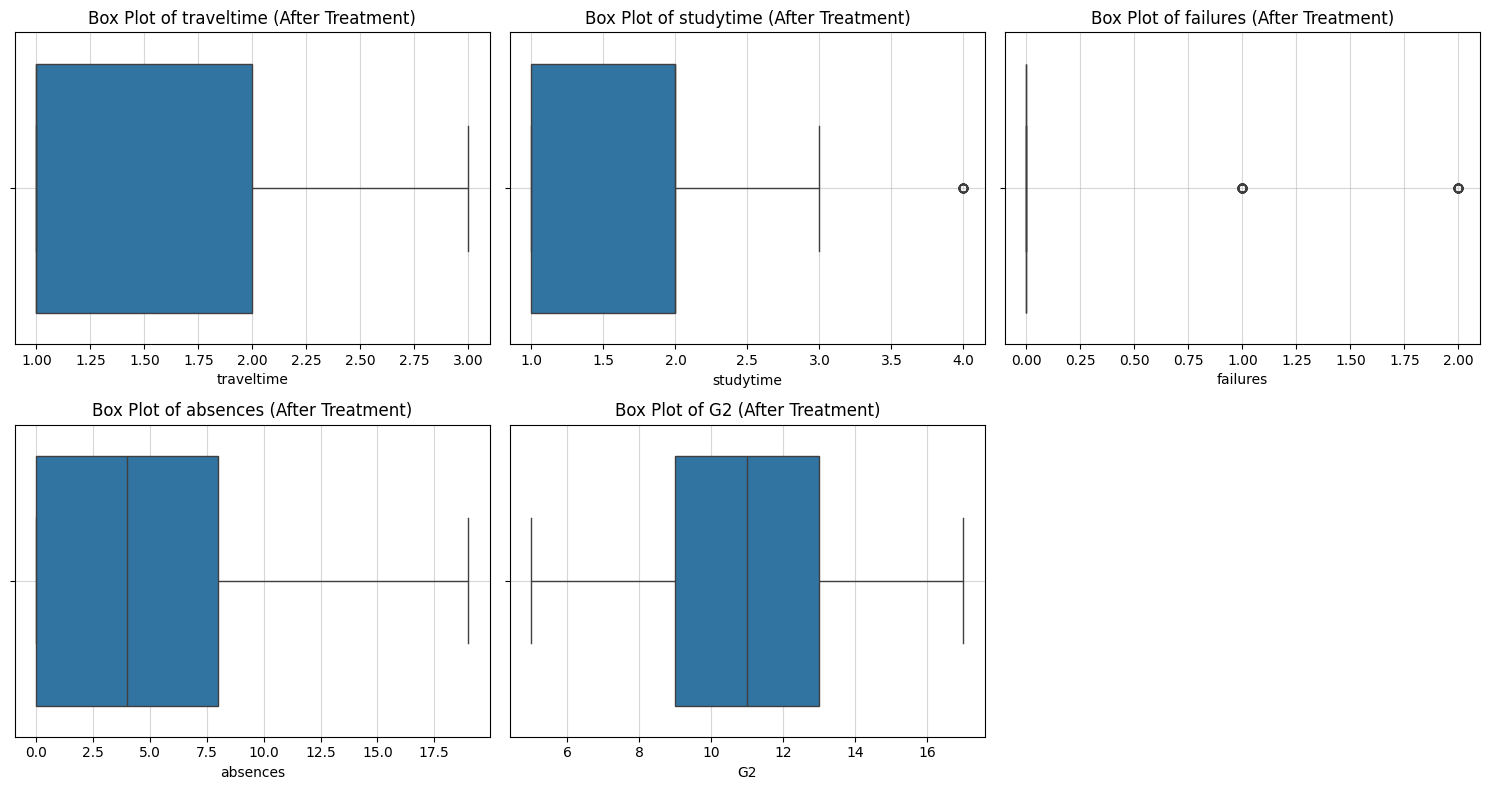

In [ ]:
#Step 10: Box plots after treatment
print("\nBox plots after treatment:")
plt.figure(figsize=(15, 8))
for i, col in enumerate(columns_with_outliers, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} (After Treatment)')
    plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

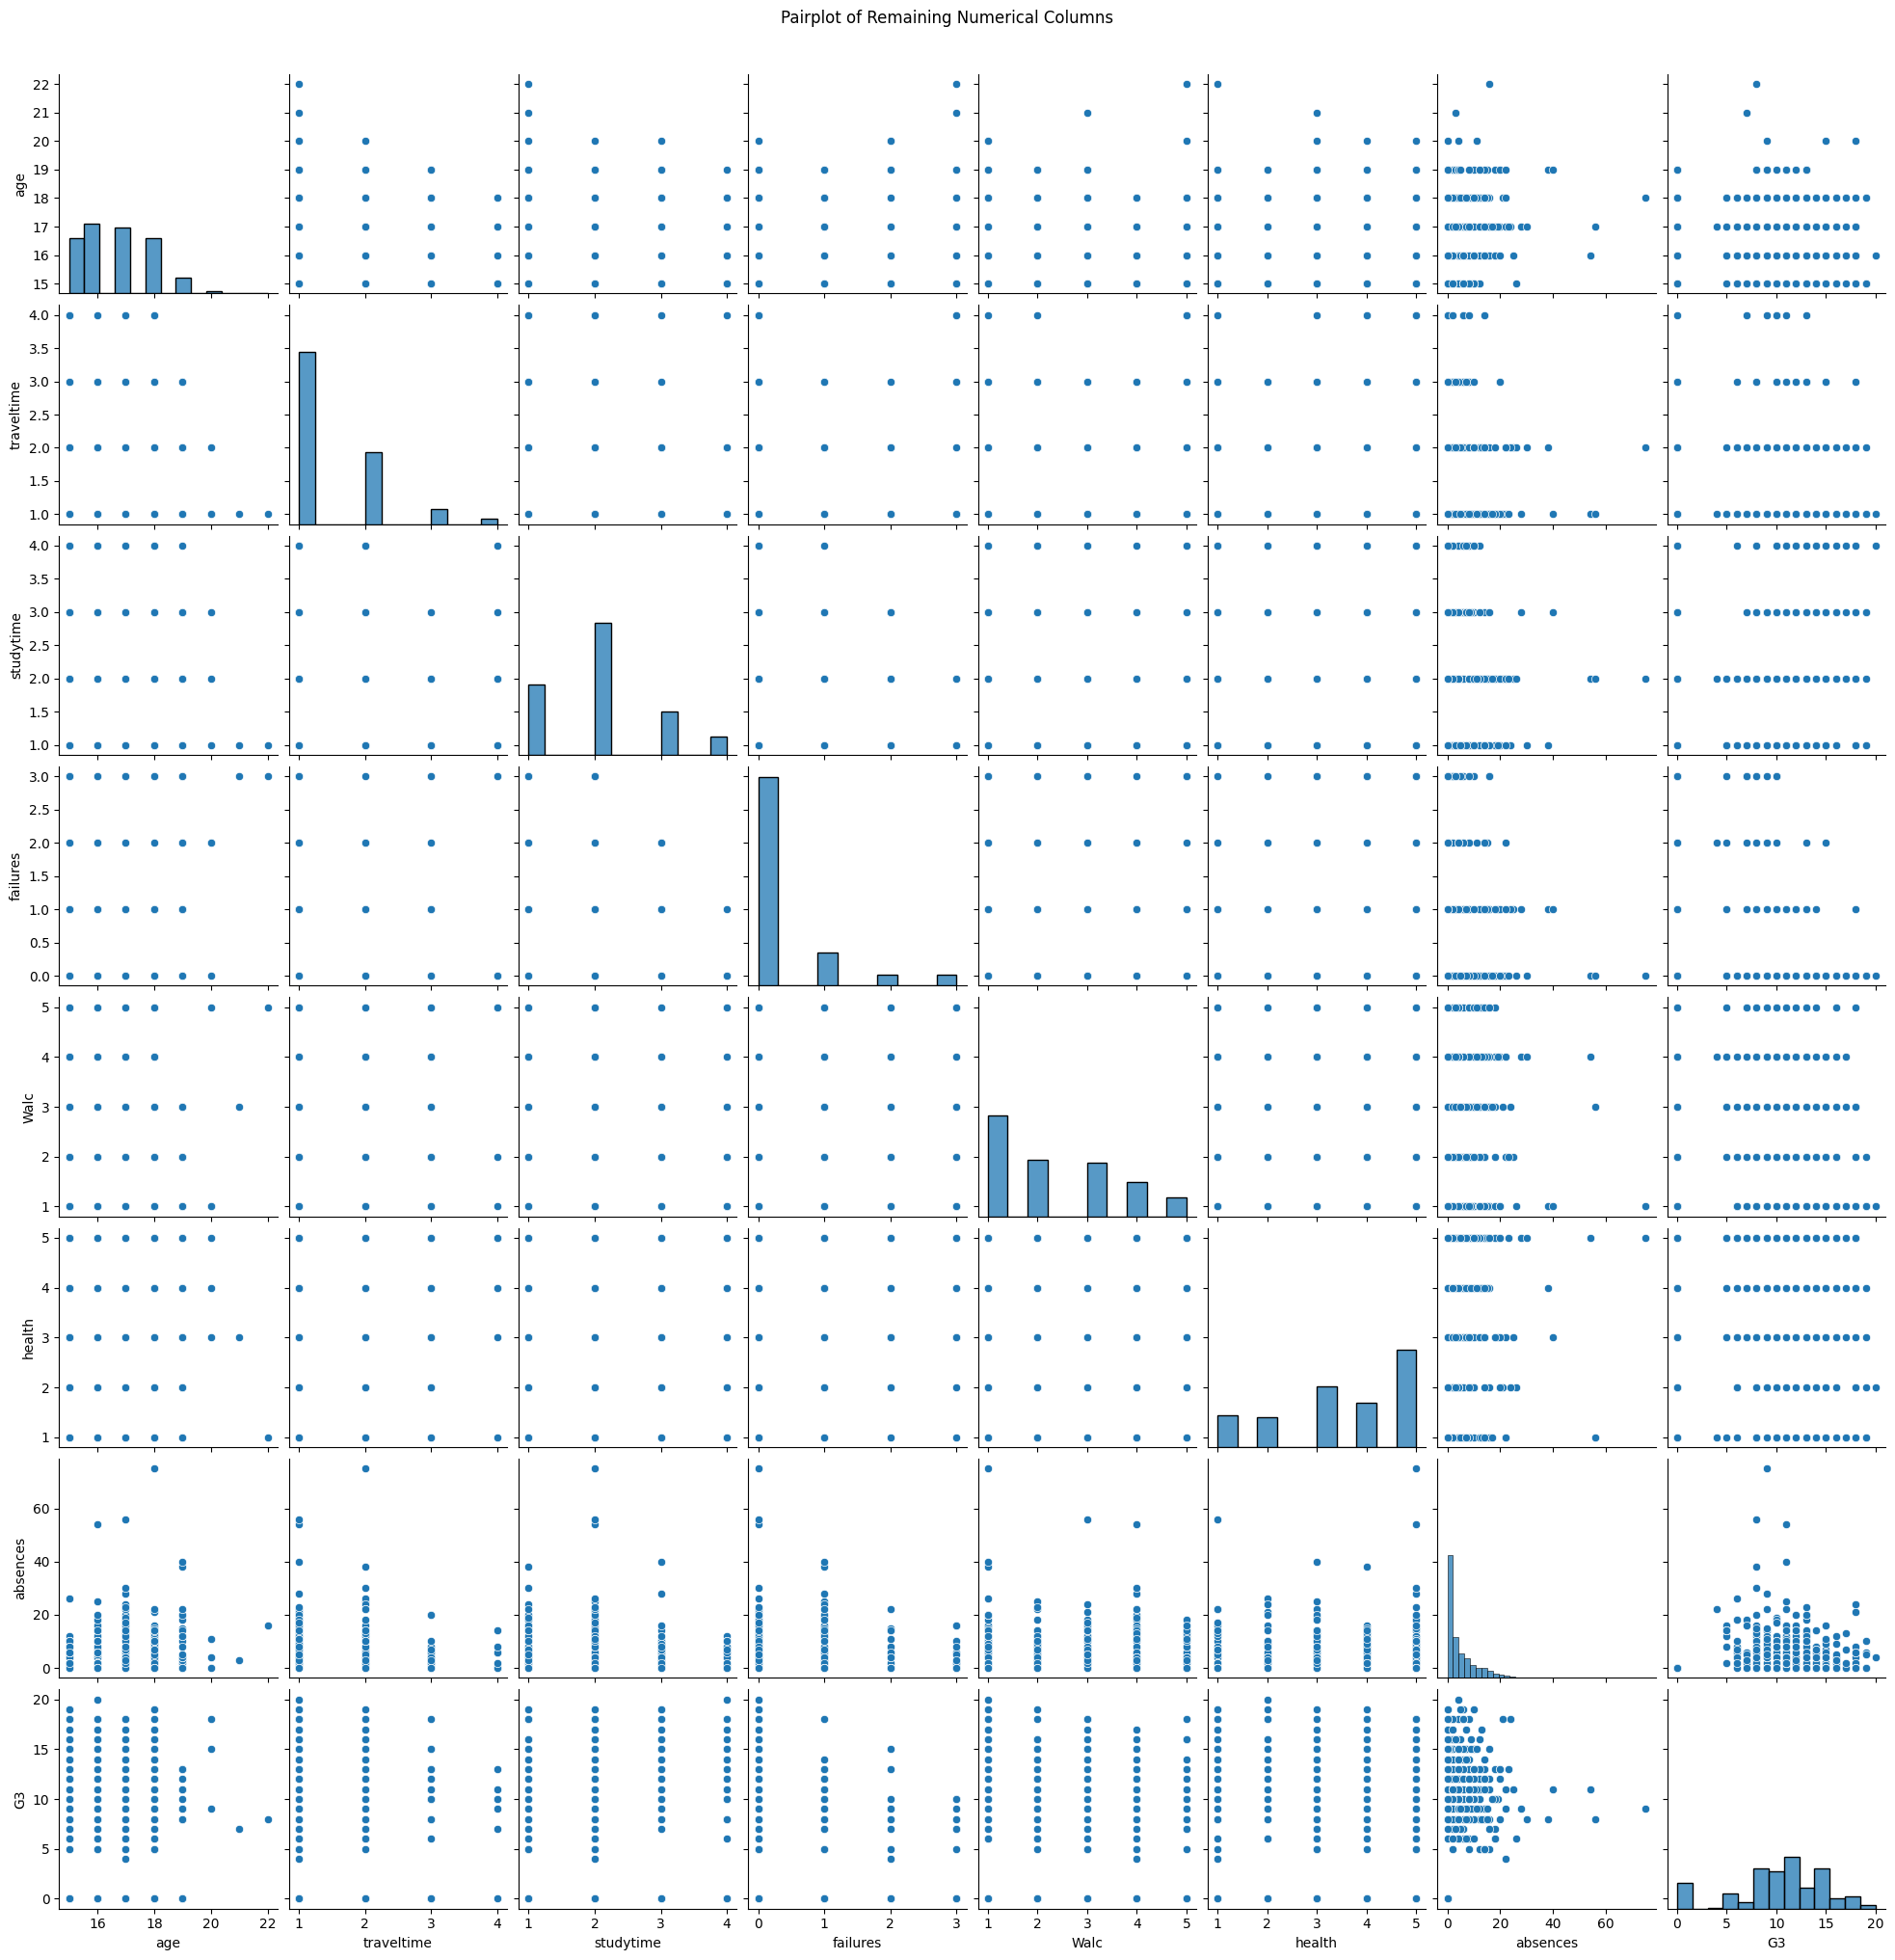

In [ ]:
#Step 11: Pairplot of remaining numerical values to check for relationship
remaining_numerical_columns = df_dropped.select_dtypes(include=[np.number]).columns

# Create a pairplot for the remaining numerical columns
plt.figure(figsize=(12, 10))
sns.pairplot(df_dropped[remaining_numerical_columns])
plt.suptitle('Pairplot of Remaining Numerical Columns', y=1.02)  # Adjust title position
plt.show()

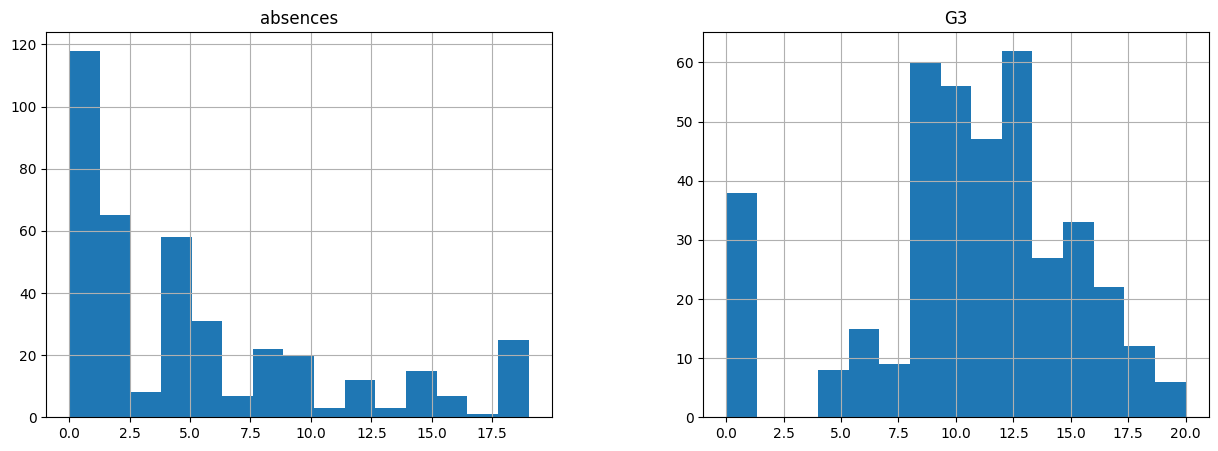

In [ ]:
# STEP 12: Data Distribution Visualization
# Selecting a subset of features for histograms
features_for_histogram = ['absences', 'G3']
df[features_for_histogram].hist(bins=15, figsize=(15, 5), layout=(1, 2))
plt.show()

In [ ]:
# Step 13: Split the dataset into training and testing sets
X = df_encoded.drop(columns=[target_variable])  # Features
y = df_encoded[target_variable]  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Step 14: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Step 15: Training different models
# Train Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Make predictions
y_pred_lin_reg = lin_reg_model.predict(X_test)

# Evaluate Linear Regression
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
print(f"Linear Regression - MSE: {mse_lin_reg}, R2: {r2_lin_reg}")


Linear Regression - MSE: 19.273082905171172, R2: 0.06008103013805155


In [ ]:
# Train Support Vector Regressor model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluate Support Vector Regressor
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"Support Vector Regressor - MSE: {mse_svr}, R2: {r2_svr}")


Support Vector Regressor - MSE: 19.42387970669619, R2: 0.052726899247562686


In [ ]:
# Training Decision Tree Regressor model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate Decision Tree Regressor
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree Regressor - MSE: {mse_tree}, R2: {r2_tree}")

Decision Tree Regressor - MSE: 30.889240506329113, R2: -0.5064213265401805


In [ ]:
#Step 16: Initialize K-Fold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a function to perform K-Fold CV and evaluate models
def evaluate_model_kfold(model, X, y):
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    print(f"Model: {type(model).__name__}")
    print(f"Cross-Validation R² Scores: {scores}")
    print(f"Mean R²: {scores.mean():.4f}, Std: {scores.std():.4f}\n")

# Models to evaluate
models = [
    LinearRegression(),
    SVR(),
    DecisionTreeRegressor()
]

# Evaluate each model using K-Fold Cross-Validation
for model in models:
    evaluate_model_kfold(model, X_train_scaled, y_train)


Model: LinearRegression
Cross-Validation R² Scores: [-0.14348891  0.24939568 -0.06307723 -0.0142775   0.1237314 ]
Mean R²: 0.0305, Std: 0.1397

Model: SVR
Cross-Validation R² Scores: [-0.12665195  0.21849633  0.11179688  0.05504554  0.08027134]
Mean R²: 0.0678, Std: 0.1120

Model: DecisionTreeRegressor
Cross-Validation R² Scores: [-0.79555193 -0.10327488 -0.88081208 -0.67090145 -0.42701878]
Mean R²: -0.5755, Std: 0.2813



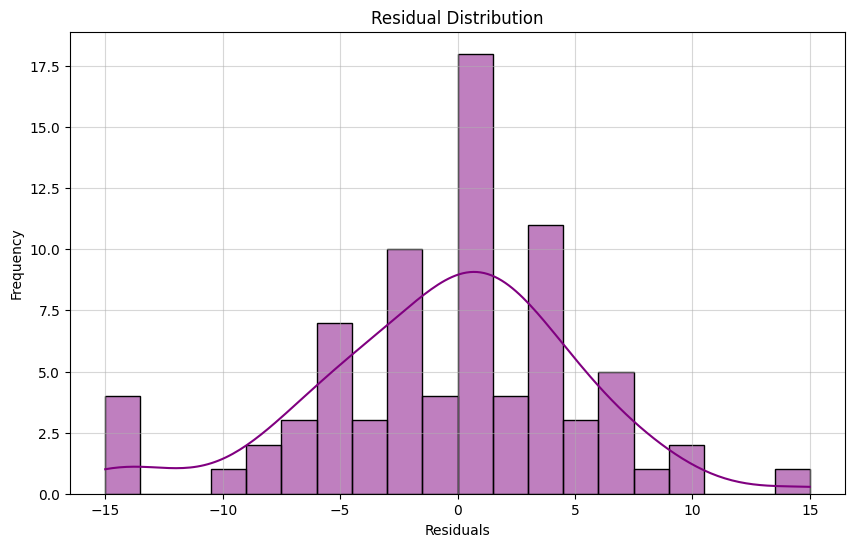

In [ ]:
# Step 17: Visualize Prediction Errors
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=20)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(alpha=0.5)
plt.show()